In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import acquire_plays_data
import prep_plays
import wrangle_plays_data
import re
plt.rc("figure", figsize=(12, 7))
plt.rc("font", size=14)

Acquire.py Loaded Successfully
Prep.py Loaded Successfully
Prep.py Loaded Successfully
Wrangle.py Loaded Successfully


In [2]:
df = pd.read_csv('players.csv')

In [3]:
df.head()

,nflId,height,weight,birthDate,collegeName,position,displayName
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell


In [4]:
df.describe()

,nflId,weight
count,1.303000e+03,1303.000000
mean,2.416518e+06,222.537222
std,5.333335e+05,29.476747
min,2.520000e+02,159.000000
25%,2.539662e+06,200.000000
50%,2.553658e+06,216.000000
75%,2.558184e+06,242.000000
max,2.561671e+06,352.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nflId        1303 non-null   int64 
 1   height       1303 non-null   object
 2   weight       1303 non-null   int64 
 3   birthDate    1303 non-null   object
 4   collegeName  1303 non-null   object
 5   position     1303 non-null   object
 6   displayName  1303 non-null   object
dtypes: int64(2), object(5)
memory usage: 71.4+ KB


In [6]:
df.height.value_counts()

73      159
72      153
74      141
75      136
71      127
76       90
70       81
77       67
6-2      42
69       37
78       37
6-0      33
5-10     32
6-1      29
5-11     27
6-3      25
6-4      25
68       18
6-5      11
79        9
5-9       9
80        3
67        3
6-7       2
6-6       2
66        2
5-7       1
5-6       1
5-8       1
Name: height, dtype: int64

In [7]:
example = '5-10'

In [8]:
feet = int(re.findall(r'(\d+)-(\d+)', example)[0][0])
feet

5

In [9]:
inches = int(re.findall(r'(\d+)-(\d+)', example)[0][1])
inches

10

### Converts the heights from feet-inches into inches

In [10]:
def conv_height(value):
    if len(re.findall(r'(\d+)-(\d+)', value)) > 0:
        feet = int(re.findall(r'(\d+)-(\d+)', value)[0][0])
        inches = int(re.findall(r'(\d+)-(\d+)', value)[0][1])
        return (feet * 12) + inches
    else:
        return value

In [11]:
df['height'] = df.height.apply(conv_height)

In [12]:
df.head()

,nflId,height,weight,birthDate,collegeName,position,displayName
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell


In [13]:
df.birthDate.value_counts()

1989-04-26    4
06/16/1988    3
1993-04-10    3
1993-01-22    3
1990-09-08    3
             ..
1991-03-28    1
1990-09-10    1
1991-05-09    1
02/01/1989    1
1994-11-23    1
Name: birthDate, Length: 1150, dtype: int64

### Converting birthdate to datetime

In [14]:
df.birthDate = pd.to_datetime(df.birthDate)

In [15]:
# Creating a age column that takes the first date and subtracts the birthdate as a
df['age'] = (pd.to_datetime('09/06/2018') - df.birthDate).astype('<m8[Y]')

In [16]:
df.head()

,nflId,height,weight,birthDate,collegeName,position,displayName,age
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,27.0
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,29.0
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen,26.0
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones,23.0
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell,25.0


In [17]:
def prep_players():
    '''
    This function acquires the players csv and prepares
    it to merge with other csv's
    '''
    # Acquire the players csv
    df= pd.read_csv('players.csv')
    # Convert the birthdate to datetime to get rid of different date formats
    df.birthDate = pd.to_datetime(df.birthDate)
    # Creating a age column that takes the start date of the 2018 season and subtracts the birthdate
    df['age'] = (pd.to_datetime('09/06/2018') - df.birthDate).astype('<m8[Y]')
    # Function that converts heights
    def conv_height(value):
        if len(re.findall(r'(\d+)-(\d+)', value)) > 0:
            feet = int(re.findall(r'(\d+)-(\d+)', value)[0][0])
            inches = int(re.findall(r'(\d+)-(\d+)', value)[0][1])
            return (feet * 12) + inches
        else:
            return value
    # Changing height column to equal just inches
    df['height'] = df.height.apply(conv_height)
    return df

In [18]:
df= prep_players()

In [19]:
df.head()

,nflId,height,weight,birthDate,collegeName,position,displayName,age
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,27.0
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,29.0
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen,26.0
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones,23.0
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell,25.0


In [20]:
import prep_season

Prep_Season.py Loaded Successfully


In [21]:
df2 = prep_season.prep_season()

CSV Successfully Created


In [22]:
df2.head().T

,51,106,154,217,274
time,2018-09-07T01:07:19.700Z,2018-09-07T01:09:14.400Z,2018-09-07T01:09:55.200Z,2018-09-07T01:10:40.700Z,2018-09-07T01:12:42.000Z
x,96.1,54.77,55.38,56.59,18.59
y,27.82,29.86,27.42,25.89,25.33
s,0.99,0.86,0.86,2.66,2.19
a,1.14,1.16,0.04,1.92,0.98
dis,0.1,0.09,0.09,0.25,0.22
o,327.4,338.33,181.68,271.87,40.17
dir,311.41,58.53,180.92,304.04,54.47
event,0,1,1,0,1
nflId,310,310,310,310,310


In [23]:
df2.describe()

,x,y,s,a,dis,o,dir,event,nflId,jerseyNumber,frameId,gameId,playId,week,weight,age
count,238419.000000,238419.000000,238419.000000,238419.000000,238419.000000,238385.000000,238387.000000,238419.000000,2.384190e+05,238419.000000,238419.000000,2.384190e+05,238419.000000,238419.000000,238419.000000,238419.000000
mean,59.814286,26.715948,3.897066,2.374655,0.392476,181.105796,180.441562,0.372844,2.385205e+06,37.467719,52.082972,2.018107e+09,2171.397204,8.942748,216.205848,26.018585
std,25.414369,12.764864,2.133256,1.320062,0.215843,105.377527,106.161570,0.483562,5.893275e+05,24.462319,12.992290,1.150319e+04,1242.867115,4.987423,23.643235,3.480568
min,-3.460000,-9.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.520000e+02,1.000000,2.000000,2.018091e+09,50.000000,1.000000,159.000000,20.000000
25%,41.630000,17.260000,2.150000,1.360000,0.220000,93.830000,91.980000,0.000000,2.533062e+06,20.000000,43.000000,2.018100e+09,1120.000000,4.000000,196.000000,23.000000
50%,59.780000,26.680000,3.880000,2.230000,0.390000,179.930000,180.260000,0.000000,2.552430e+06,29.000000,50.000000,2.018110e+09,2162.000000,9.000000,212.000000,25.000000
75%,77.885000,36.160000,5.480000,3.210000,0.550000,270.730000,269.700000,1.000000,2.557969e+06,53.000000,59.000000,2.018120e+09,3203.000000,13.000000,235.000000,28.000000
max,123.600000,60.630000,10.910000,12.520000,2.990000,360.000000,360.000000,1.000000,2.561671e+06,99.000000,160.000000,2.018123e+09,5637.000000,17.000000,350.000000,41.000000


In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238419 entries, 51 to 17097289
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   time           238419 non-null  object        
 1   x              238419 non-null  float64       
 2   y              238419 non-null  float64       
 3   s              238419 non-null  float64       
 4   a              238419 non-null  float64       
 5   dis            238419 non-null  float64       
 6   o              238385 non-null  float64       
 7   dir            238387 non-null  float64       
 8   event          238419 non-null  int64         
 9   nflId          238419 non-null  float64       
 10  displayName    238419 non-null  object        
 11  jerseyNumber   238419 non-null  float64       
 12  position       238419 non-null  object        
 13  frameId        238419 non-null  int64         
 14  team           238419 non-null  object        
 1

In [25]:
#df2.dropna(axis=0, inplace=True)

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238419 entries, 51 to 17097289
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   time           238419 non-null  object        
 1   x              238419 non-null  float64       
 2   y              238419 non-null  float64       
 3   s              238419 non-null  float64       
 4   a              238419 non-null  float64       
 5   dis            238419 non-null  float64       
 6   o              238385 non-null  float64       
 7   dir            238387 non-null  float64       
 8   event          238419 non-null  int64         
 9   nflId          238419 non-null  float64       
 10  displayName    238419 non-null  object        
 11  jerseyNumber   238419 non-null  float64       
 12  position       238419 non-null  object        
 13  frameId        238419 non-null  int64         
 14  team           238419 non-null  object        
 1

In [32]:
df2.event.value_counts()

0    149526
1     88893
Name: event, dtype: int64

In [27]:
df2.position.value_counts()

CB     48123
WR     47497
OLB    21087
TE     20445
FS     18438
QB     17428
RB     17330
SS     14395
ILB    12342
LB      7184
MLB     5881
DB      5123
S       1728
HB       595
FB       581
DE       143
DL        35
DT        28
LS        14
P         13
NT         6
K          3
Name: position, dtype: int64

In [28]:
df2.event.value_counts()

0    149526
1     88893
Name: event, dtype: int64

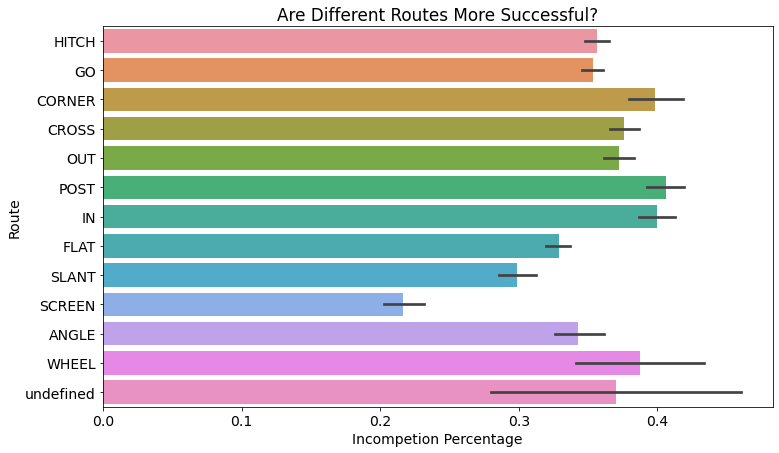

In [31]:
sns.barplot(data=df2,x='event', y='route')
plt.xlabel('Incompetion Percentage')
plt.ylabel('Route')
plt.title("Are Different Routes More Successful?")
plt.show()

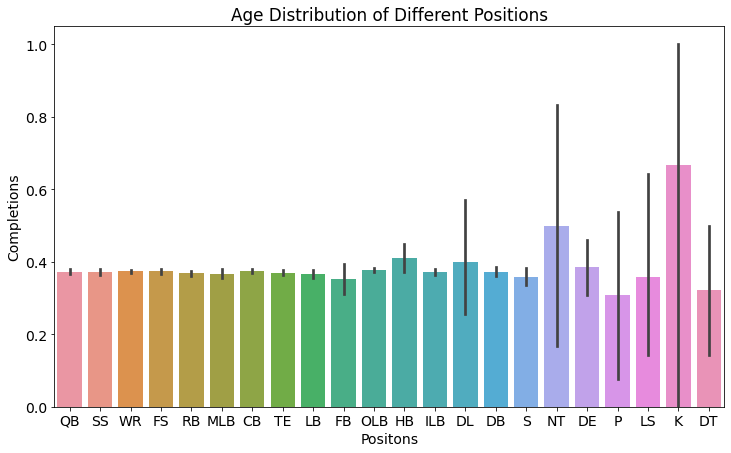

In [30]:
sns.barplot(data=df2,x='position', y='event')
plt.xlabel('Positons')
plt.ylabel('Completions')
plt.title("Age Distribution of Different Positions")
plt.show()

In [33]:
df2.groupby('position').s.agg(['mean','count','min','max']).sort_values(by='mean',ascending =False)

,mean,count,min,max
position,,,,
K,4.456667,3,2.96,6.25
FS,4.409577,18438,0.01,9.98
DB,4.371062,5123,0.06,10.10
S,4.345880,1728,0.05,9.71
SS,4.291164,14395,0.00,10.29
WR,4.273598,47497,0.00,10.91
CB,4.252641,48123,0.00,10.68
LB,4.192529,7184,0.04,9.84
MLB,4.161013,5881,0.00,9.77
